# Bài 1

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

In [6]:
df = pd.read_csv('sales.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

In [7]:
final = seasonal_decompose(df['Sales'], model = 'multiplicative')

<Axes: xlabel='Month'>

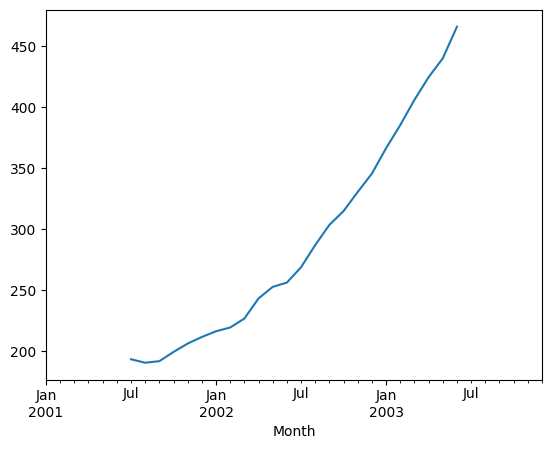

In [8]:
final.trend.plot()

<Axes: xlabel='Month'>

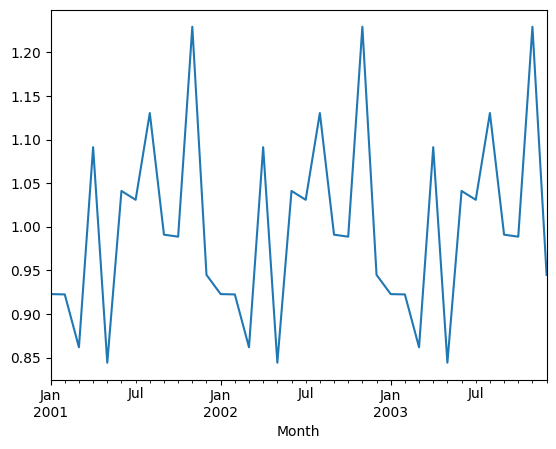

In [9]:
final.seasonal.plot()

# Bài 2

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [61]:
df = pd.read_csv('Electric_Production.csv').dropna()
df.columns = ['Date', 'Output']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Output
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


<Axes: xlabel='Date'>

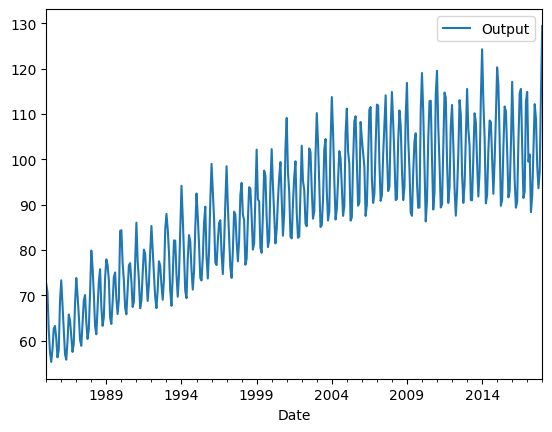

In [62]:
df.plot()

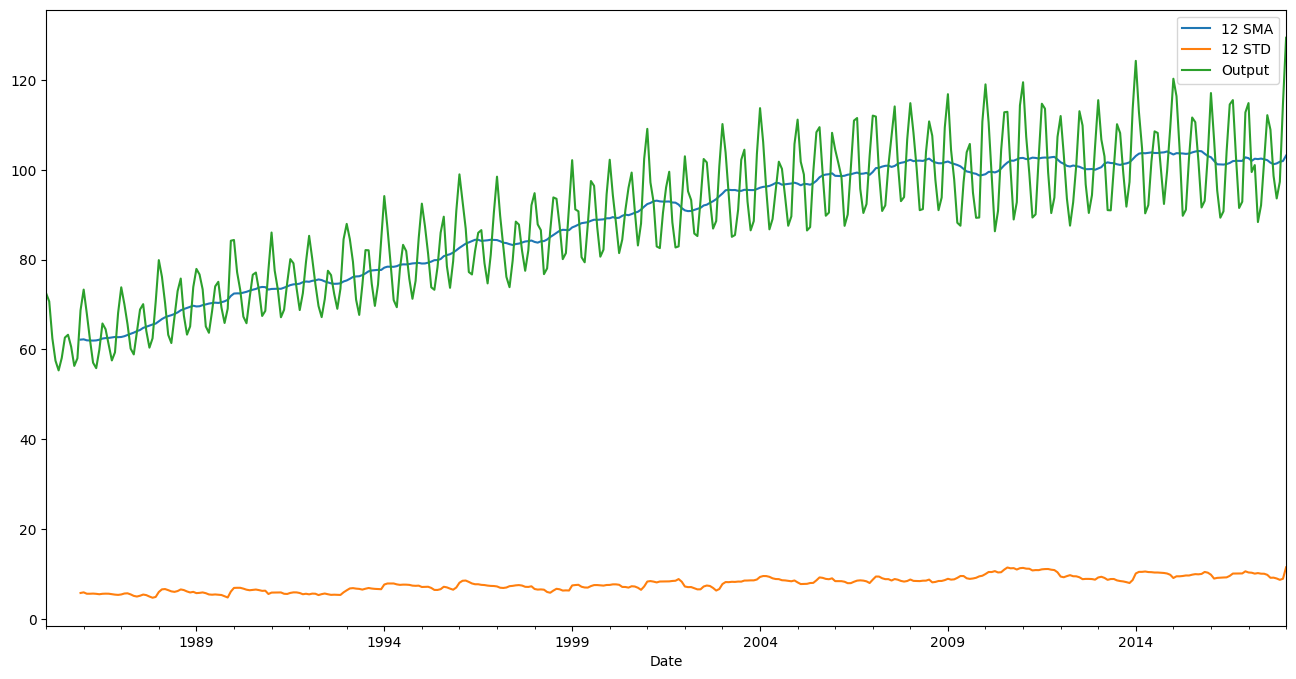

In [63]:
df['Output'].rolling(12).mean().plot(label= '12 SMA',figsize = (16,8)) 
df['Output'].rolling(12).std().plot(label= '12 STD') 
df['Output'].plot() 
plt.legend()


In [66]:
df_season_compose = seasonal_decompose(df['Output'].dropna(), model='multiplicative')
df_season_composes = seasonal_decompose(df['Output'].dropna(), model='additive')


Text(0.5, 1.0, 'Resid data')

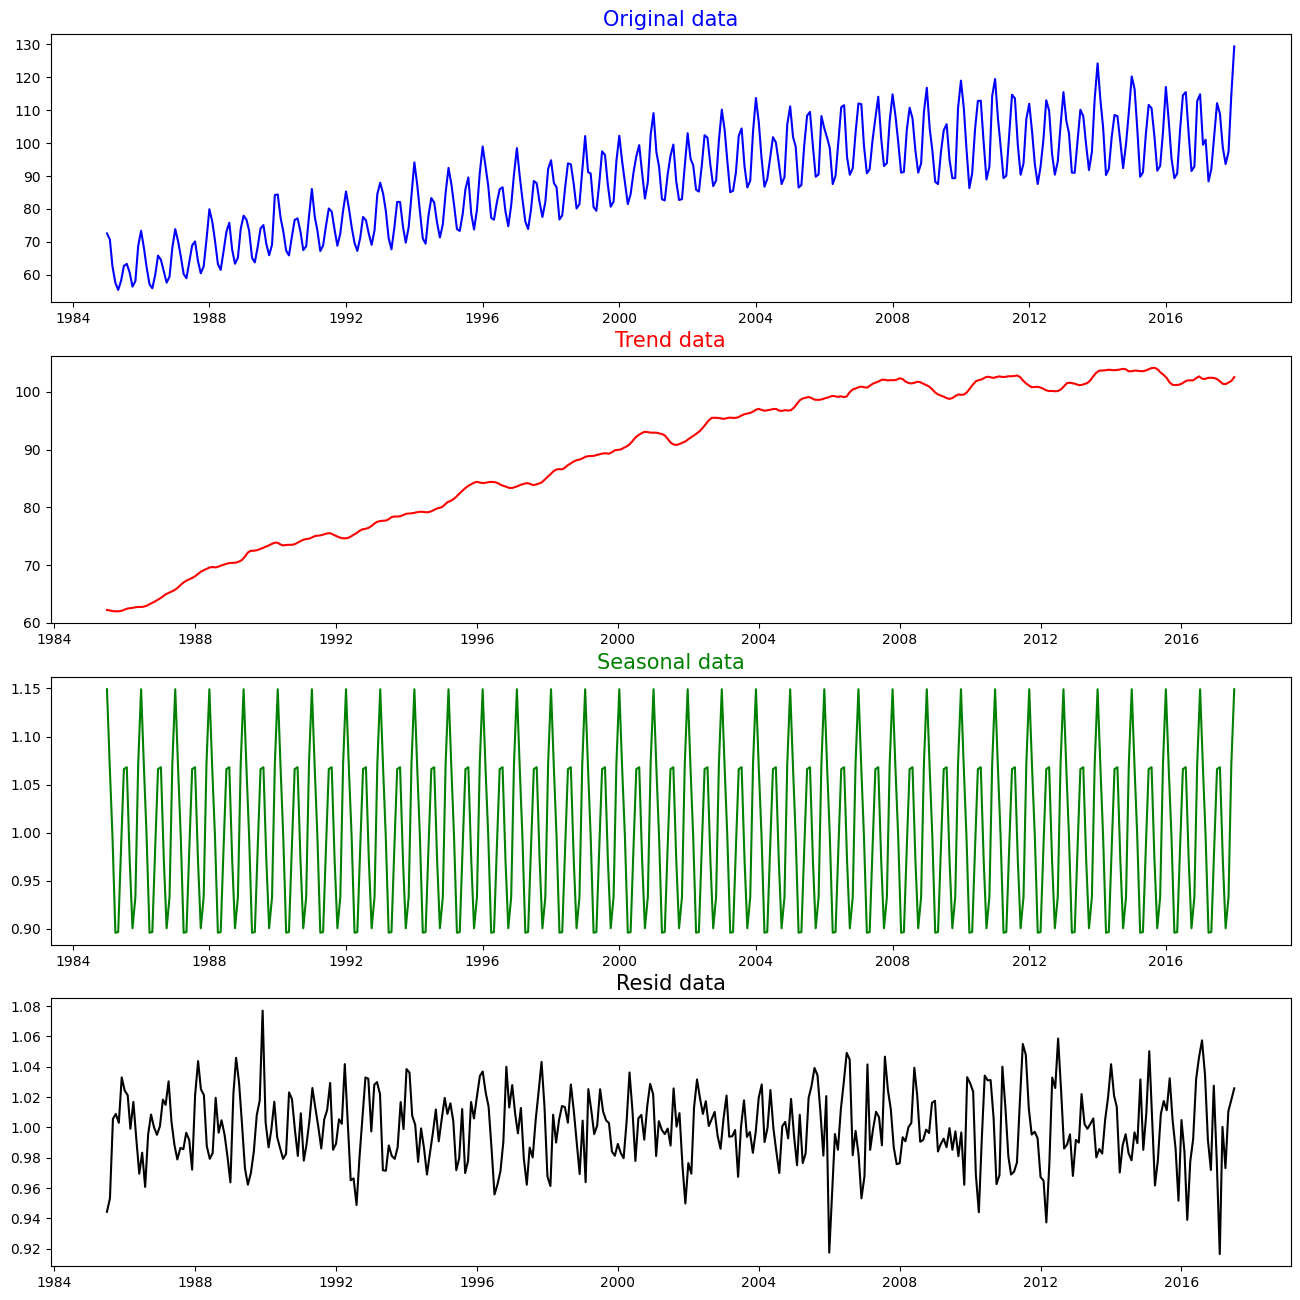

In [ ]:
plt.figure(figsize=(16,16))

plt.subplot(4, 1, 1)
plt.plot(df['Output'], color='blue')
plt.title('Original data', color='blue', fontsize=15)

plt.subplot(4, 1, 2)
plt.plot(df_season_compose.trend, color = 'red')
plt.title('Trend data', color = 'red', fontsize = 15)

plt.subplot(4, 1, 3)
plt.plot(df_season_compose.seasonal, color='green')
plt.title('Seasonal data', color='green', fontsize = 15)

plt.subplot(4, 1, 4)
plt.plot(df_season_compose.resid, color='black')
plt.title('Resid data', color='black', fontsize = 15)

## Kiểm tra xem dữ liệu có dừng hay không

In [72]:
from statsmodels.tsa.stattools import adfuller

In [74]:
fuller_test = adfuller(df['Output'])
print(fuller_test)

(np.float64(-2.25699035004725), np.float64(0.18621469116586592), 15, 381, {'1%': np.float64(-3.4476305904172904), '5%': np.float64(-2.869155980820355), '10%': np.float64(-2.570827146203181)}, np.float64(1840.8474501627156))


In [76]:
def test_p_value(data):
    p_value = adfuller(data)[1]
    print('p_value: ', p_value)
    if p_value <= 0.05:
        print('Bác bỏ giả thuyết NULL, dữ liệu dừng')
    else:
        print('Không bác bỏ giả thuyết NULL, dữ liệu không dừng')
test_p_value(df['Output'])

p_value:  0.18621469116586592
Không bác bỏ giả thuyết NULL, dữ liệu không dừng


## Chuyển về dữ liệu dừng

p_value:  4.0777865655394095e-10
Bác bỏ giả thuyết NULL, dữ liệu dừng


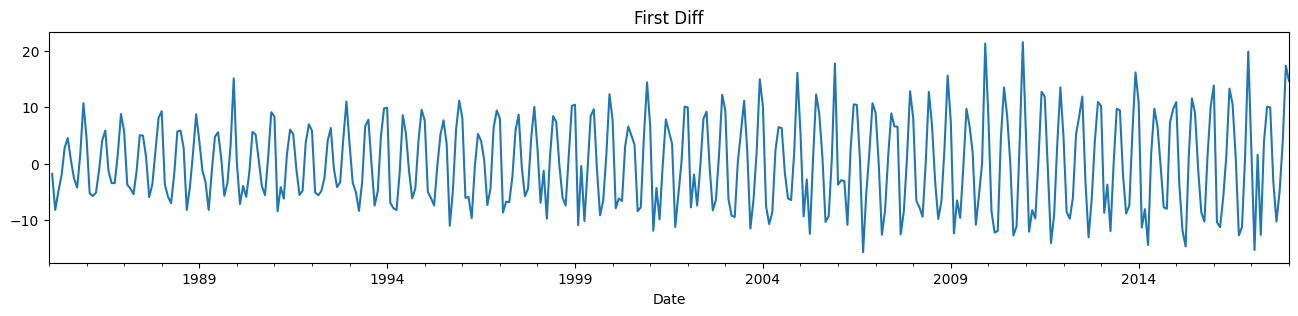

In [91]:
plt.figure(figsize=(16, 3))
df['First_diff'] = df['Output']-df['Output'].shift(1) #shif(1) là độ trượt 1 đơn vị để xét khi tính toán
df['First_diff'].plot(title='First Diff')
test_p_value(df['First_diff'].dropna())


p_value:  4.183693747998922e-17
Bác bỏ giả thuyết NULL, dữ liệu dừng


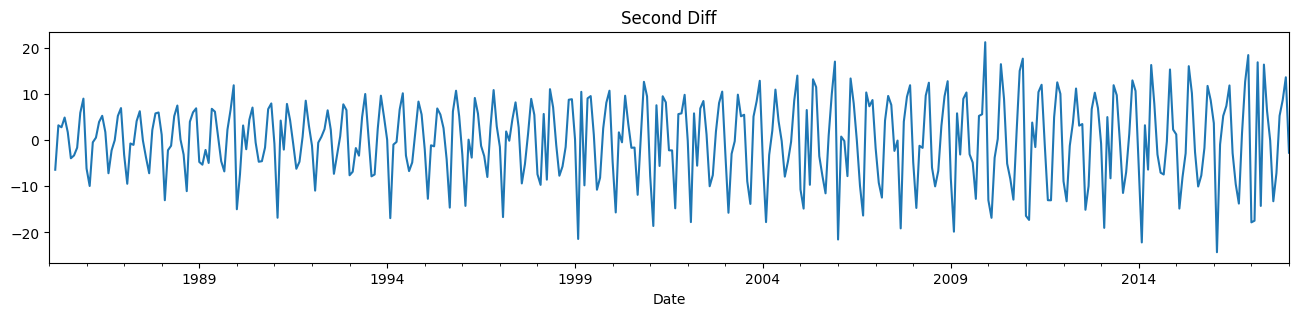

In [92]:
plt.figure(figsize=(16, 3))
df['Second_diff'] = df['First_diff'] - df['First_diff'].shift(1) 
df['Second_diff'].plot(title='Second Diff')
test_p_value(df['Second_diff'].dropna())

p_value:  8.812644938089282e-07
Bác bỏ giả thuyết NULL, dữ liệu dừng


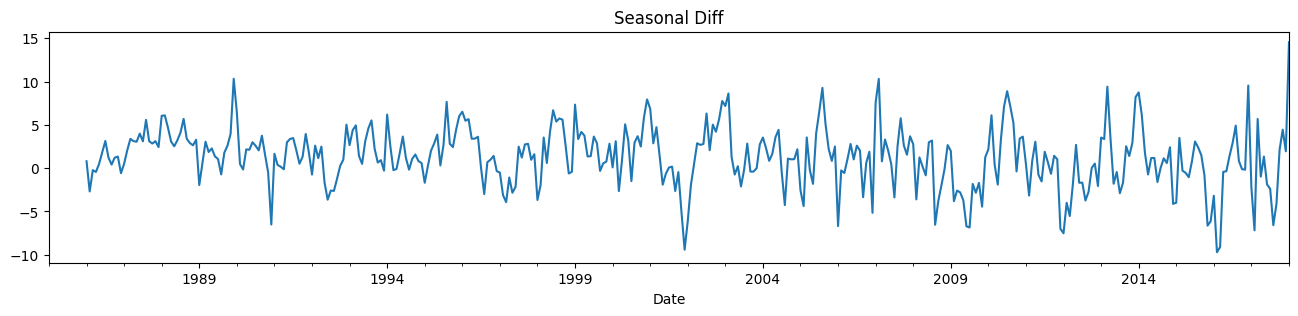

In [94]:
plt.figure(figsize=(16, 3))
df['Seasonal_diff'] = df['Output'] - df['Output'].shift(12) 
df['Seasonal_diff'].plot(title='Seasonal Diff')
test_p_value(df['Seasonal_diff'].dropna())

## Vẽ đồ thị ACF và PACF

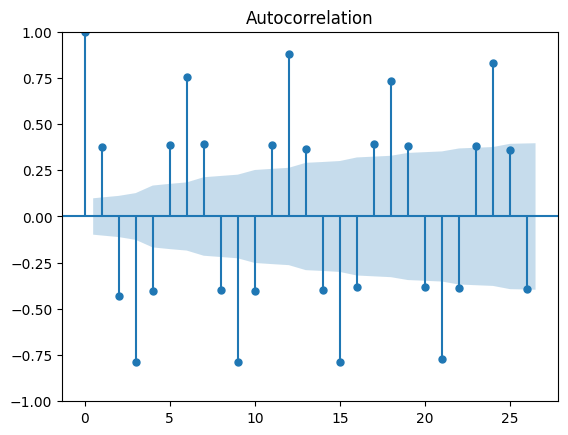

In [95]:
from statsmodels.graphics.tsaplots import  plot_acf, plot_pacf

first_diff = plot_acf(df['First_diff'].dropna())


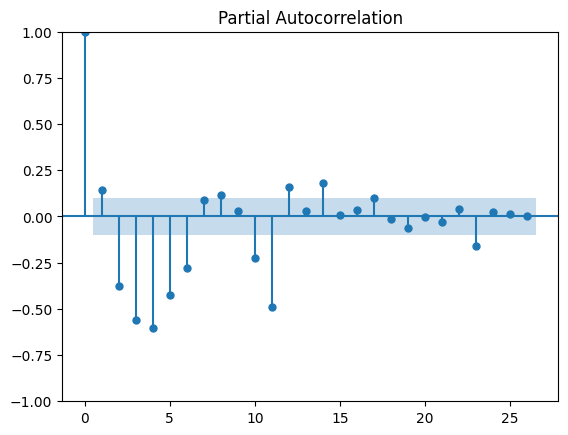

In [96]:
sec_diff = plot_pacf(df['Second_diff'].dropna())

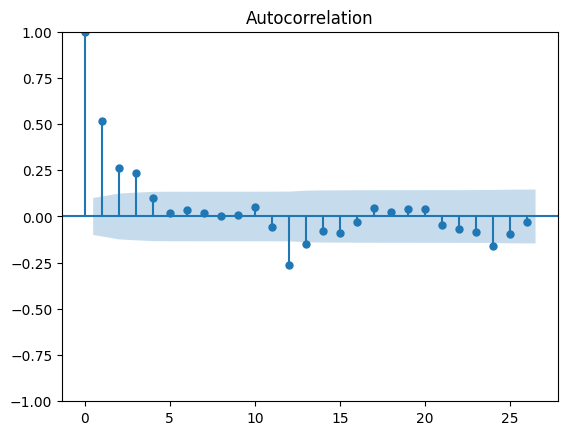

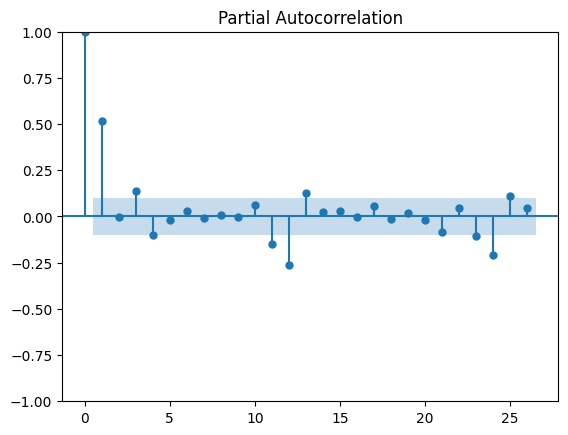

In [97]:
p1 = plot_acf(df['Seasonal_diff'].dropna()) 
p2 = plot_pacf(df['Seasonal_diff'].dropna())

## Xây dựng mô hình ARIMA

In [100]:
from statsmodels.tsa.arima.model import ARIMA

In [103]:
arima_model = ARIMA(df['Output'], order=(1, 0, 1))
arima_fit = arima_model.fit()
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Output   No. Observations:                  397
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1292.695
Date:                Thu, 16 Jan 2025   AIC                           2593.391
Time:                        20:21:08   BIC                           2609.327
Sample:                    01-01-1985   HQIC                          2599.704
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.1176      2.554     34.888      0.000      84.111      94.124
ar.L1          0.7887      0.040     19.950      0.000       0.711       0.866
ma.L1          0.6194      0.045     13.810      0.0

c:\Users\NguyenHuuNghia\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\NguyenHuuNghia\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\NguyenHuuNghia\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
